
# Looking for Data Science Jobs in North America? Here Are Some Things You Should Know
### from the [Kaggle Machine Learning & Data Sicnece Survey 2020](https://www.kaggle.com/c/kaggle-survey-2020)  

<a id="table-of-contents"></a>

1. [Introduction](#introduction)
2. [Data Preparation](#preparation)
3. [What is your option among various data jobs?](#datajobs)
    * 3.1. [Different job titles, different activities](#datajobs-activities) 
    * 3.2. [Meet the data professionals: Gender, Age and Compenstion](#datajobs-meet) 
4. [What expereicne are required? Programming, Machine Learning, or Higher Education?](#experience)
5. [What skills do you need to stand out your resume? Professionals vs. Students](#skills)
6. [Takeaways](#takeaways)
7. [References](#reference)

<a id="introduction"></a>
[back to top](#table-of-contents)

# 1. Introduction

### Are you one of the data science enthusiasts? If so, you probably have questions similar to what I have because there are different kinds of job positions in professional data fields. Without understanding each job title, you would not know where to start. Let's take a look at who really are the data professionals currently working in North America, then build up the list of the required skills and take away some practical tips from them. 


<!-- ![main-image](magnet-me-LDcC7aCWVlo-unsplash.jpg) -->
<img src="https://images.unsplash.com/photo-1598257006626-48b0c252070d?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1950&q=80">
<span>Photo by <a href="https://unsplash.com/@magnetme?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Magnet.me</a> on <a href="https://unsplash.com/s/photos/data-professional?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>


<a id="preparation"></a>
[back to top](#table-of-contents)

# 2. Data Preparation

In this section, let's shape the original dataset "[Kaggle Machine Learning & Data Sicnece Survey 2020](https://www.kaggle.com/c/kaggle-survey-2020)" into our working data frame. Although it is a well-formatted dataset, we need to modify some part of it to draw some findings related to our questions as following points: 
- The survey questions in the data frame are located at the top row --> need to be deleted 
- The first column of the data frame(Survey Duration) is not relevant info --> need to be deleted  
- Multiple choice responses are already distributed into each columns --> no need to process
- Note that all columns (survey questions) are categorical variables
- Data Frame 1 **includs only NorthAmerican Data Professionals** --> need to filter out any observations gathered from students or undemployed ones as well as outside of North America
- Data Frame 2 **includs only NorthAmerican Data Students** --> need to filter out any observations gathered from professionals or undemployed ones as well as outside of North America

Originally, the dataset has 20,036 observations and 355 column variables(1 Duration, 18 single-choice-questions, and 336 multiple-choice-questions) but after preparation, the final data frame1 has 1,909 observations and 354 columns and the data frame2 has 395 observations and 354 columns

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sns 
%matplotlib inline

plt.rcParams['figure.dpi'] = 200 #high resolution

In [2]:
"""Data Preparation: Read&Explore"""

df_raw = pd.read_csv(r"C:\Users\suhon\Documents\Data Scientist Nanodegree\KaggleSurvey2020-Analysis\kaggle-survey-2020\kaggle_survey_2020_responses.csv") # local 
# df_raw = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv") # kaggle notebook 

# check the basic information 
print(df_raw.info())

# check the number of single choice questions
columns_single = df_raw.filter(regex="^(?!.*Part)(?!.*OTHER)").columns
#df_raw[columns_single].describe()
print(f"\nNumber of single choice questions: {columns_single.shape[0]}") 

# check the number of multiple choice questions
columns_multiple = df_raw.filter(regex="^(?=.*Part)|(?=.*OTHER)").columns
#df_raw[columns_multiple].describe()
print(f"\nNumber of multiple choice questions: {columns_multiple.shape[0]}")


df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB
None

Number of single choice questions: 19

Number of multiple choice questions: 336


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
"""Data Preparation: Formatting"""

# delete the first row and save it into the list 
list_questions = list(df_raw.iloc[0])
df0 = df_raw.drop(df_raw.index[0], axis=0)

# delete the first column 
df0 = df0.drop(columns=df0.columns[0], axis=1)

# only include current data professionals
q5_order = [
    'Research Scientist',
    'Machine Learning Engineer',
    'Data Scientist',
    'Data Analyst', 
    'Data Engineer',
    'DBA/Database Engineer',
    'Software Engineer',
    'Statistician',
    'Business Analyst',
    'Product/Project Manager',
    # 'Student', 
    # 'Currently not employed', 
    'Other']

# only include developers in North America: US and Canada 
q3_order = [
    'United States of America', 
    'Canada']

# DF: drop the unnecessary observations 
df = df0[df0['Q5'].isin(q5_order) & df0['Q3'].isin(q3_order)]

# DF_STUDENT: only include current students
df_std = df0[df0['Q5'].isin(['Student']) & df0['Q3'].isin(q3_order)]

# print the prepared data frame 
print(df.info())
print(df_std.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 2 to 20007
Columns: 354 entries, Q1 to Q35_B_OTHER
dtypes: object(354)
memory usage: 5.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 26 to 20026
Columns: 354 entries, Q1 to Q35_B_OTHER
dtypes: object(354)
memory usage: 1.1+ MB
None


,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
17070,25-29,Man,United States of America,Master’s degree,Other,3-5 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
16446,30-34,Man,United States of America,Doctoral degree,Data Scientist,10-20 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8198,35-39,Man,Canada,Master’s degree,Data Scientist,10-20 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
3102,30-34,Man,United States of America,Doctoral degree,Data Scientist,10-20 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1454,35-39,Man,United States of America,Bachelor’s degree,Other,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="datajobs"></a>
[back to top](#table-of-contents)

# 3. What is your option among various data jobs? 

We are data enthusiasts, so let's meet the working professionals throughout their statistical data! First, you can explore some general job titles along with the comparison of their roles (3.1. [Different job titles, different activities](#datajobs-roles)). Then, you will get a sense of the current trends in those positions with some statistics of the data professionals ( 3.2. [Meet the data professionals: Gender, Age and Compenstion](#datajobs-meet))


[back to top](#table-of-contents)

<a id="datajobs-roles"></a>
## 3.1. Different job titles, different roles

Presumably, you may search only "Data Scientist" or "Machine learning engineer" in a job search engine, but you might be surprised that many DS&ML professionals in the Kaggle platform defines their professions with many different job titles. Here are short descriptions of some confusing job titles. 


- **Machine Learning Engineer**: A software engineer who leverages big data tools and programming frameworks to ensure that the raw data gathered from data pipelines are redefined as data science models that are ready to scale as needed. They’re also responsible for taking theoretical data science models and helping scale them out to production-level models that can handle terabytes of real-time data.[springboard.com](https://www.springboard.com/blog/machine-learning-engineer-vs-data-scientist/)

- **Data Scientist**: A data profesesional who applies statistics, machine learning, and anlaytic approaches to solve critical business problems, and are also expected to have strong programming skills, an ability to design new algorithms, and some expertise in the domain knowledge to handle big data - [cognitiveclass.ai](https://cognitiveclass.ai/blog/data-scientist-vs-data-engineer)

- **Data Analyst**: A data professional in their organization who can query and process data, provide reports, summarize and visualize data, but in most of time, they are not expected to deal with anlyzing big data nor to develop new algorithms" - [cognitiveclass.ai](https://cognitiveclass.ai/blog/data-scientist-vs-data-engineer)

- **Data Engineer**: A software engineer who prepares the “big data” infrastructure to be analyzed by Data Scientists, more specifically, design, build, integrate data from various resources, and manage big data to optimize the performance of their company’s big data ecosystem. - [cognitiveclass.ai](https://cognitiveclass.ai/blog/data-scientist-vs-data-engineer)

- **Database Adminimstrator(DBA)/Database Engineer**: A software engineer who stores and organizes data, which includs some roles such as capacity planning, installation, configuration, database design, migration, performance monitoring, security, troubleshooting, as well as backup and data recovery - [wikipedia.org](https://en.wikipedia.org/wiki/Database_administrator)

- **Business Analyst(BA)**: A data professional who analyzes an organization or business domain (real or hypothetical) and documents its business, processes, or systems, assessing the business model or its integration with technology - [wikipedia.org](https://en.wikipedia.org/wiki/Business_analyst)

- Other Professions working with Data: **Research Scientist, Software Engineer,Statistician and Product/Project Manager**.



To have a better understading of each job title, let's look at the below figure which compares job roles across the different job titles. Here are some `findings` from the comparison

1. Most common roles of all the data professionals are **Data Analysis(26.88%)**, **Prototyping(18.35%)** and **Data Infrastructure(15.64%)**
2. **Data scientists do more data analysis tasks than ml engineers** while ml engineers are more focusing on prototyping and building machine learning service
3. Data engineers and DBAs use a third of their working time in Building the data infrastructure
4. Data analysts and Business analysts spend almost half of their activities in analyzing and understanding data to influence product business decisions   



<!-- In the Kaggle DS&ML survey, there are seven types of typical data roles.

|Roles | Description|
|---------------|:-------------------------------------------------------------|
|**Analysis** | Analyze and understand data to influence product or business decisions|
|**Data Infrastructure** | Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data|
|**Prototyping** | Build prototypes to explore applying machine learning to new areas|
|**Machine Learning** | Build and/or run a machine learning service that operationally improves my product or workflows|
|**Experiments** | Experimentation and iteration to improve existing ML models|
|**Research** | Do research that advances the state of the art of machine learning|
|**None** | None of these activities are an important part of my role at work|
|**Other** | Other data related roles|
 -->



In [4]:
"""Wrangling Data for Jobtitle-Activity relationship """

q23_map = {'Analysis':'Analyze and understand data to influence product or business decisions',
            'Data Infrastructure':'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 
            'Prototyping':'Build prototypes to explore applying machine learning to new areas', 
            'Machine Learning':'Build and/or run a machine learning service that operationally improves my product or workflows', 
            'Experiments':'Experimentation and iteration to improve existing ML models', 
            'Research':'Do research that advances the state of the art of machine learning', 
            'None':'None of these activities are an important part of my role at work', 
            'Other':'Other'}

q23_col_map = { 'Q23_Part_1':'Analysis', 
                'Q23_Part_2':'Data Infrastructure', 
                'Q23_Part_3':'Prototyping',
                'Q23_Part_4':'Machine Learning', 
                'Q23_Part_5':'Experiments', 
                'Q23_Part_6':'Research', 
                'Q23_Part_7':'None', 
                'Q23_OTHER':'Other'}

# change the value of columns related to Q23 to short name and numerical value to count
df_q23 = df.filter(regex="^(?=.*Q23)").rename(columns=q23_col_map).copy()
df_q23.fillna(0, inplace=True)
df_q23.replace(to_replace=list(q23_map.values()), value=1, inplace=True)

# combine Q5 with Q23 
df_q5q23 = pd.concat([df[['Q5']], df_q23], axis=1).groupby('Q5').sum().loc[q5_order].T
# add a total 
df_q5q23['All Professionals'] = df_q5q23.sum(axis=1)
df_q5q23 = df_q5q23[['All Professionals']+q5_order] # change the order 
# combine 'Other' and 'None'
df_q5q23.loc['Other'] += df_q5q23.loc['None'] 
df_q5q23.drop('None', axis=0, inplace=True)

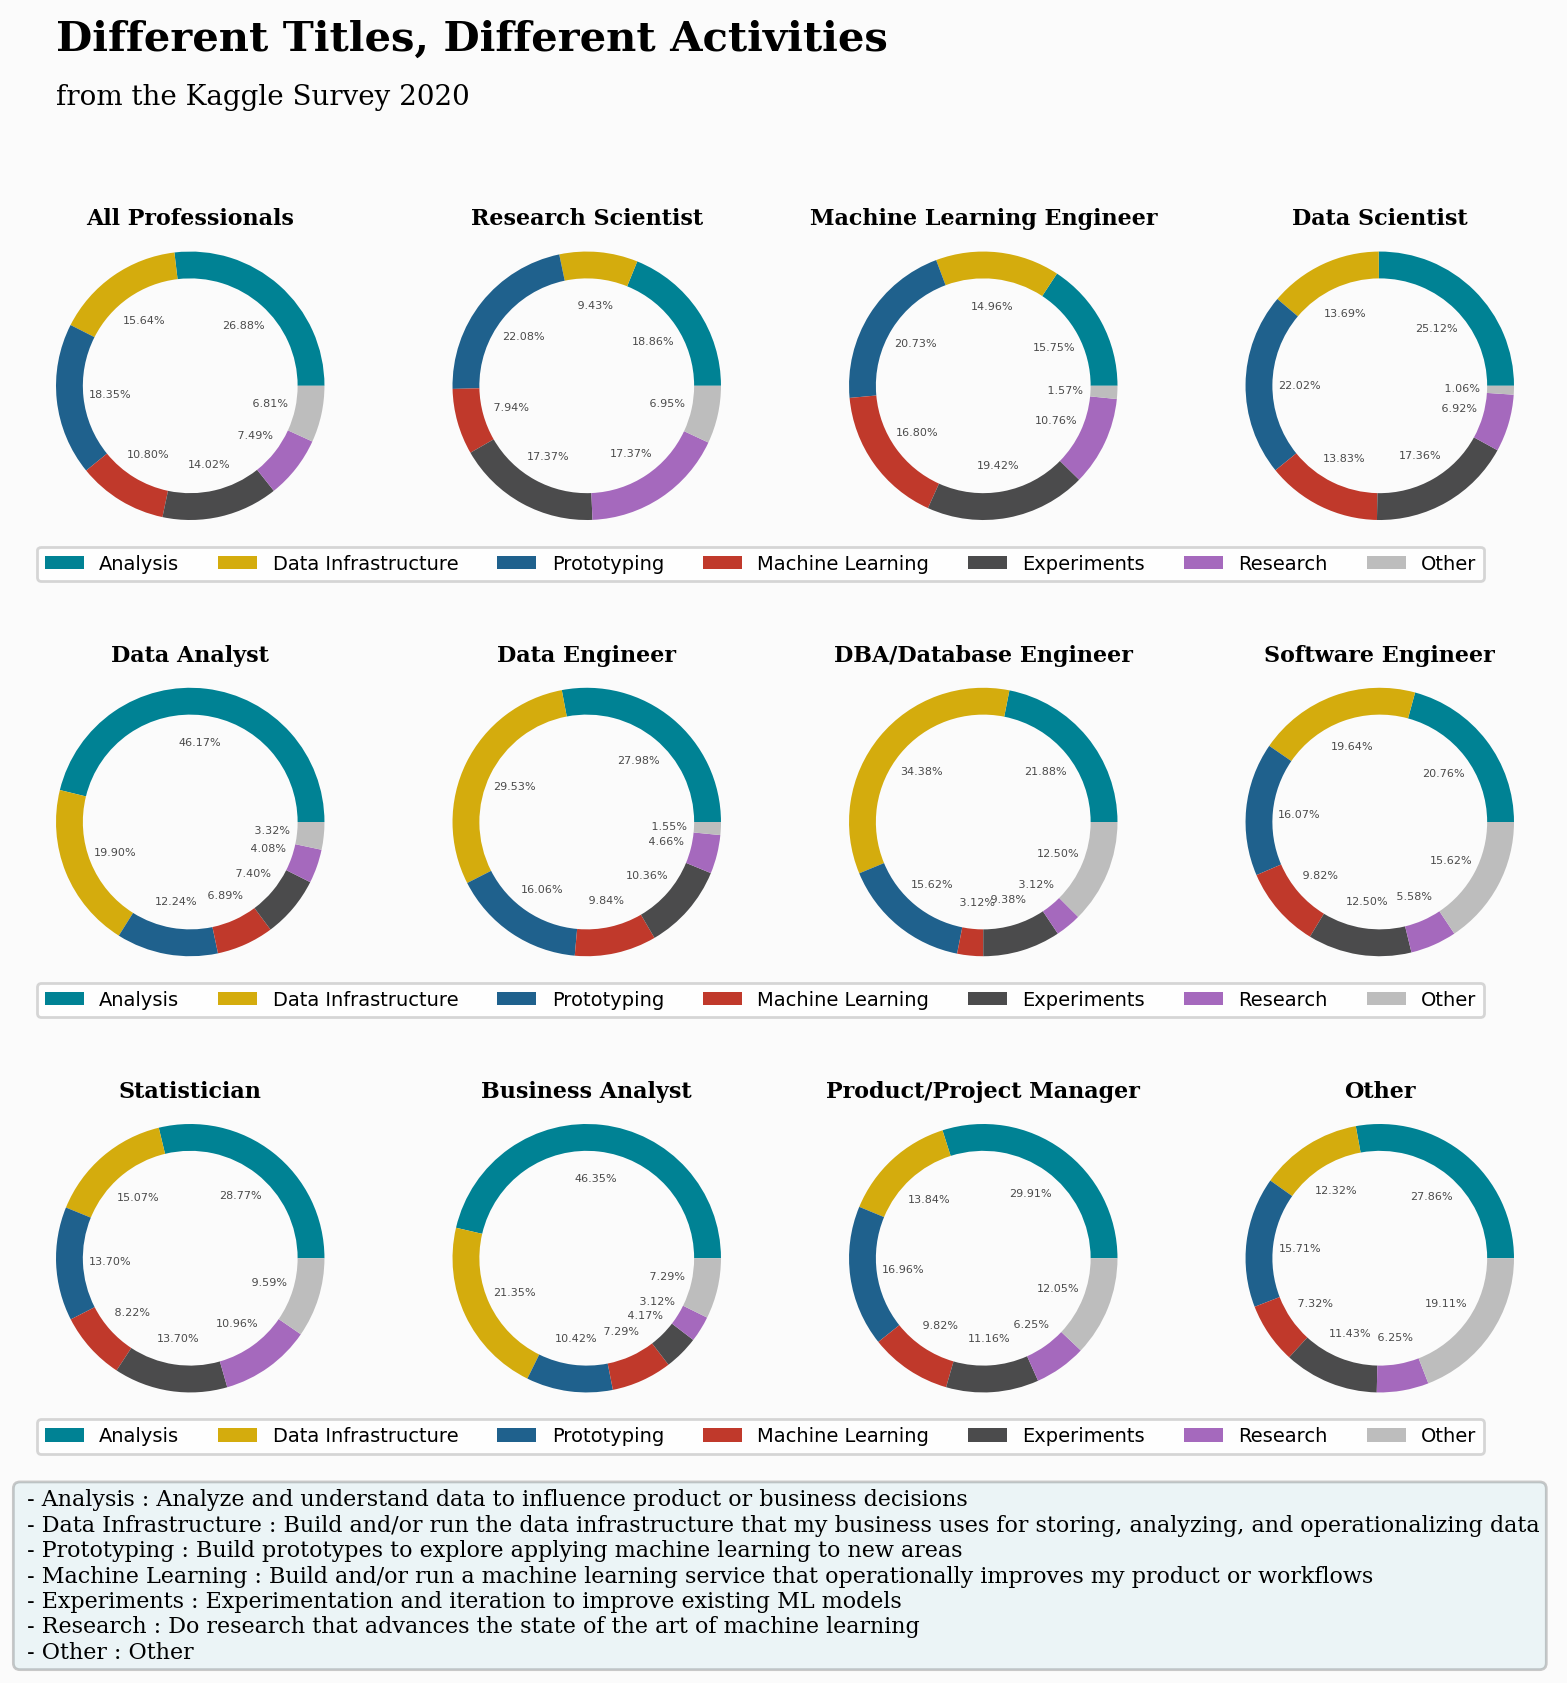

In [5]:
"""Figure1: Plotting Multiple Pie Graphs for Jobtitle-Activity """

# configure the grid size 
fig1 = plt.figure(figsize=(10,8)) 
gs_w, gs_h = 3, 4
gs = fig1.add_gridspec(gs_w, gs_h)
gs.update(wspace=0.1, hspace=0.3) 
axes1 = []
for i in range(gs_w):
    for j in range(gs_h): 
        axes1.append(fig1.add_subplot(gs[i, j]))

# draw a pie chart
color_map = ["#008294", "#d4ac0d", "#1f618d", "#c0392b", "#4b4b4c", "#A569BD","#bdbdbd"]
fig1.patch.set_facecolor('#fbfbfb')
for i in range(gs_w * gs_h): 
    # wedges, texts =  axes1[i].pie(x=df_q5q23.iloc[:, i], colors=color_map, wedgeprops=dict(width=0.2)) # plain
    wedges, texts, autotexts =  axes1[i].pie(x=df_q5q23.iloc[:, i], colors=color_map, wedgeprops=dict(width=0.2), 
                                            autopct=lambda pct: f"{pct:5.2f}%", textprops=dict(color="#4a4a4a", fontsize=4))
    axes1[i].text(0, 1.2, df_q5q23.columns[i], fontsize=8, fontweight='bold', fontfamily='serif', horizontalalignment='center')
    axes1[i].set_facecolor('#fbfbfb')

    
# configure texts in graph 
axes1[0].text(-1., 2.5, 'Different Titles, Different Activities', fontsize=15, fontweight='bold', fontfamily='serif')
axes1[0].text(-1., 2.1, 'from the Kaggle Survey 2020', fontsize=10, fontweight='light', fontfamily='serif')
axes1[0].legend(wedges, df_q5q23.index,  bbox_to_anchor=(2.2, 0.05), loc="upper center", ncol=7, fontsize=7)
axes1[4].legend(wedges, df_q5q23.index,  bbox_to_anchor=(2.2, 0.05), loc="upper center", ncol=7, fontsize=7)
axes1[8].legend(wedges, df_q5q23.index,  bbox_to_anchor=(2.2, 0.05), loc="upper center", ncol=7, fontsize=7)

fig1.text(0.13, -0.02, "\n".join([f" - {k} : {q23_map[k]}" for k in df_q5q23.index]), 
            fontsize=8, fontweight='light', fontfamily='serif', 
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2))
print()

[back to top](#table-of-contents)

<a id="datajobs-meet"></a>
## 3.2. Meet the Data Professionals: Gender, Age and Compensation

Let's discover the data professionals currently working in North America. Based on the three graphs below, most of the data professionals using the Kaggle platform are **men(77%)**, **25-40 years old (49%)**, and expected to make **100k-150k US dollars per year**. Please check each figure to see the details of the job title you want to seek. 



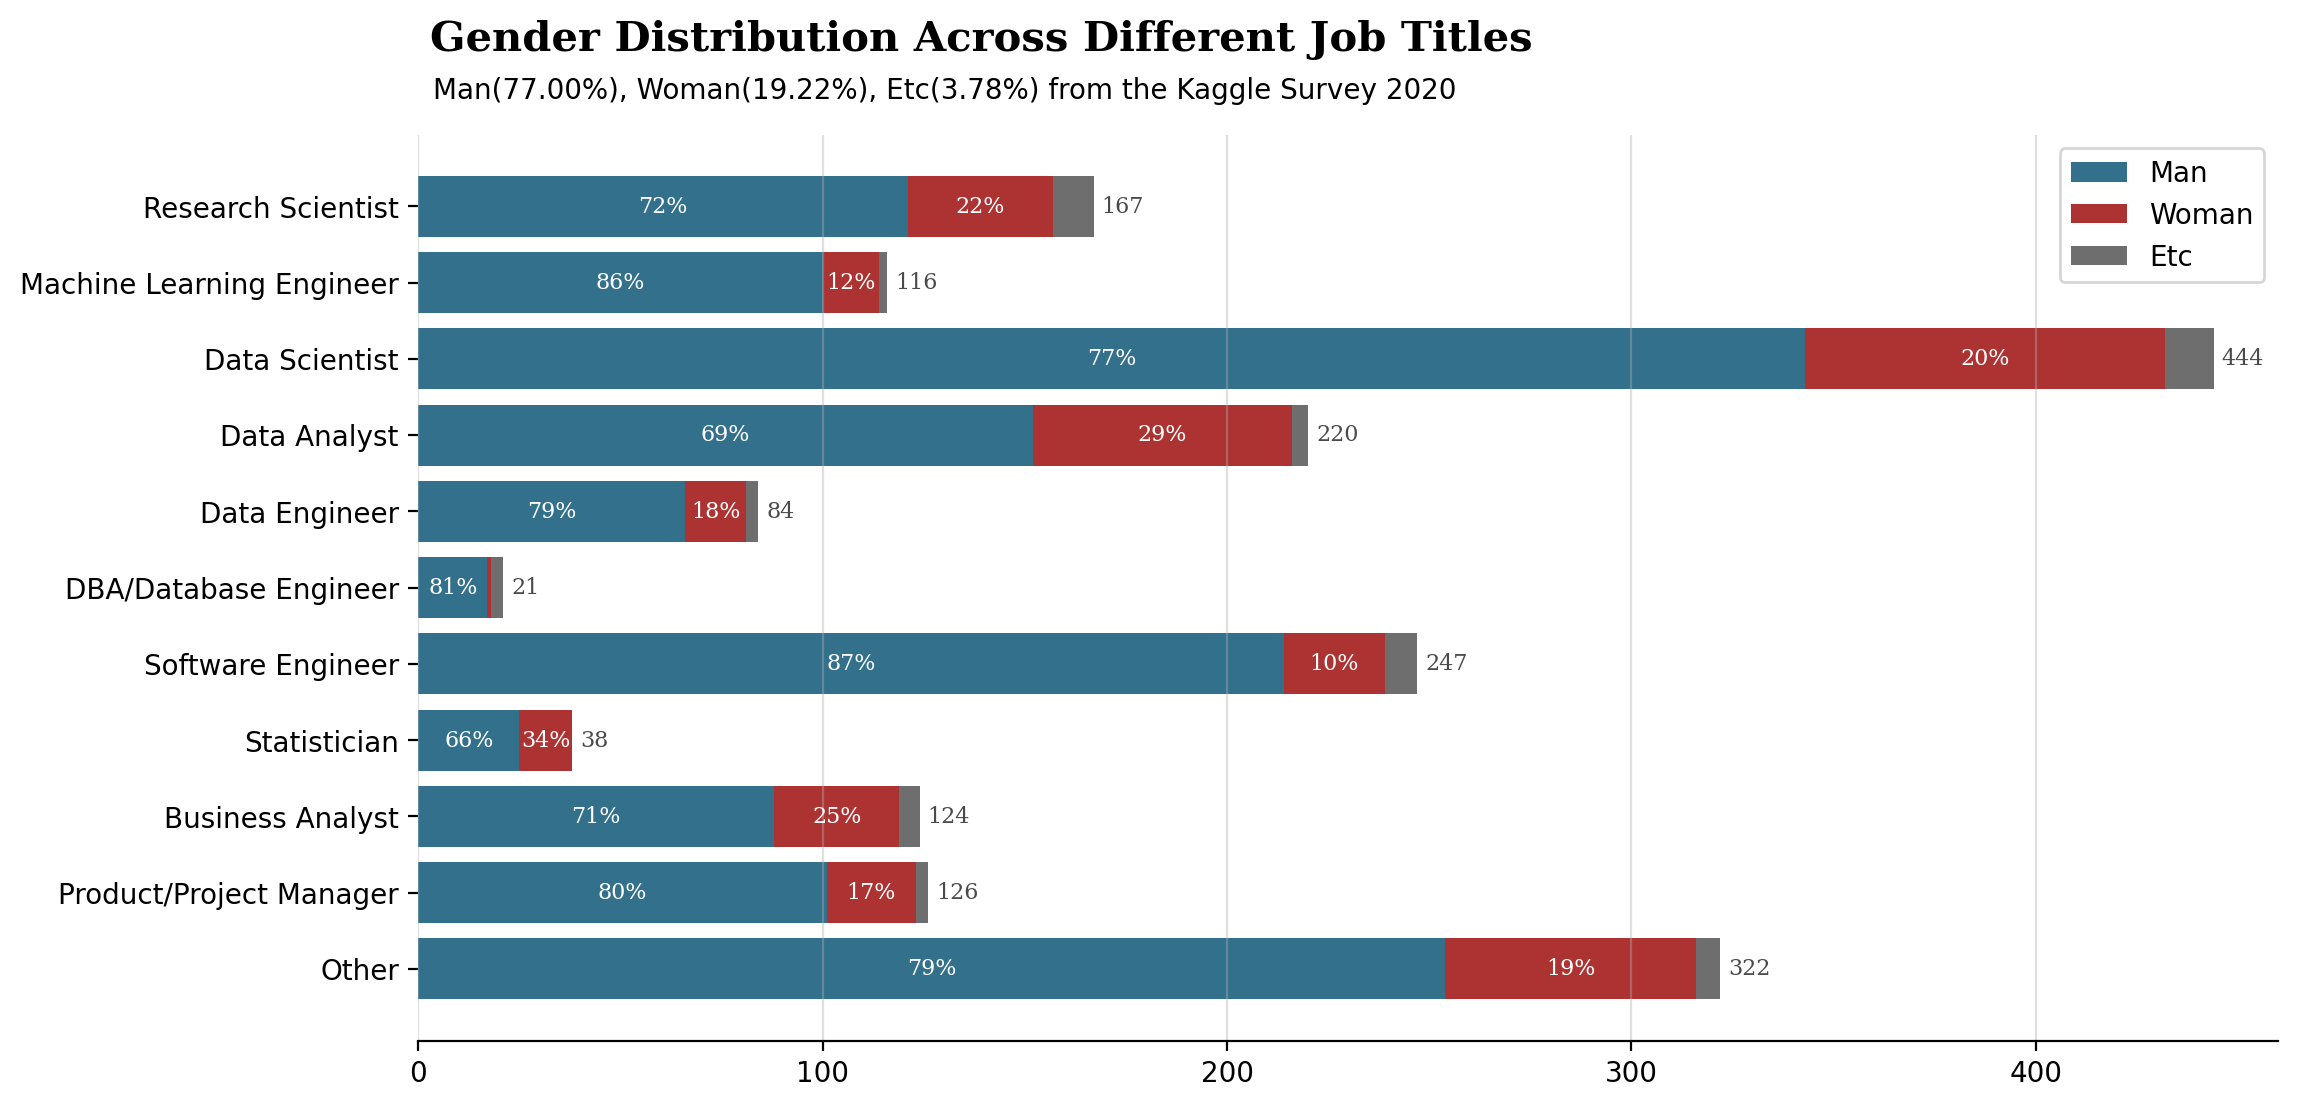

In [6]:
""" Figure3: Gender Distributions across different job titles """

# join jobtitle(Q5) and Gender(Q2) 
df_q5q2 = df[['Q2','Q5']].groupby('Q5')['Q2'].value_counts().unstack().loc[q5_order]
df_q5q2 = df_q5q2.fillna(0)

# group gender categries into ['Man', 'Woman', 'Etc']
etc_columns = [x for x in df['Q2'].unique() if x not in ['Man', 'Woman']]
df_q5q2['Etc'] = df_q5q2[etc_columns].sum(axis=1)
df_q5q2.drop(columns=etc_columns, axis=1, inplace=True)

# add "total" column to annotate the graph 
df_q5q2['total'] = df_q5q2.sum(axis=1) 
# add ratio columns 
df_q5q2[['Man_r', 'Woman_r', 'Etc_r']] = (df_q5q2[['Man', 'Woman', 'Etc']].T / (df_q5q2['total'] + 0.001)).T # convert it into ratio 

# order is upside down when plotting a bar chart
df_q5q2 = df_q5q2.iloc[::-1]

# plot a horizontal barchart 
fig3, ax3 = plt.subplots(1,1,figsize=(12,6))

ax3.barh(df_q5q2.index, df_q5q2['Man'], 
         color='#004c70', alpha=0.8, label='Man')
ax3.barh(df_q5q2.index, df_q5q2['Woman'], left=df_q5q2['Man'], 
         color='#990000', alpha=0.8, label='Woman')
ax3.barh(df_q5q2.index, df_q5q2['Etc'],left=df_q5q2['Man']+df_q5q2['Woman'],
         color='#4a4a4a', alpha=0.8, label='Etc')

for i in df_q5q2.index: 
    ax3.annotate(f"{df_q5q2['total'][i]:.0f}",
                 xy=(df_q5q2['total'][i]+2, i), 
                 va = 'center', ha='left', fontweight='light', fontfamily='serif',
                 color='#4a4a4a', fontsize=8)
    if (df_q5q2['Man'][i] > 10):
        ax3.annotate(f"{df_q5q2['Man_r'][i]*100:.0f}%", 
                      xy=(df_q5q2['Man'][i]/2, i), va = 'center', ha='center', 
                      fontweight='light', fontfamily='serif', color='white', fontsize=8)
    if (df_q5q2['Woman'][i] > 10):
        ax3.annotate(f"{df_q5q2['Woman_r'][i]*100:.0f}%", 
                     xy=(df_q5q2['Man'][i] + (df_q5q2['Woman'][i]/2), i), 
                     va = 'center', ha='center', 
                     fontweight='light', fontfamily='serif', color='white', fontsize=8)


for s in ['top', 'left', 'right']:
    ax3.spines[s].set_visible(False)

ax3.set_xlim(0, 460)
ax3.set_ylabel("")
ax3.legend(prop=dict(size=10))
ax3.grid(axis='x', linestyle='-', alpha=0.4)

fig3.text(0.13, 0.95, 'Gender Distribution Across Different Job Titles', 
          fontsize=15, fontweight='bold', fontfamily='serif')
all_man_ratio = df_q5q2.mean(axis=0)['Man_r']*100
all_women_ratio = df_q5q2.mean(axis=0)['Woman_r']*100
all_etc_ratio = df_q5q2.mean(axis=0)['Etc_r']*100
fig3.text(0.131, 0.91, f'Man({all_man_ratio:.2f}%), Woman({all_women_ratio:.2f}%), Etc({all_etc_ratio:.2f}%) from the Kaggle Survey 2020')

plt.show()




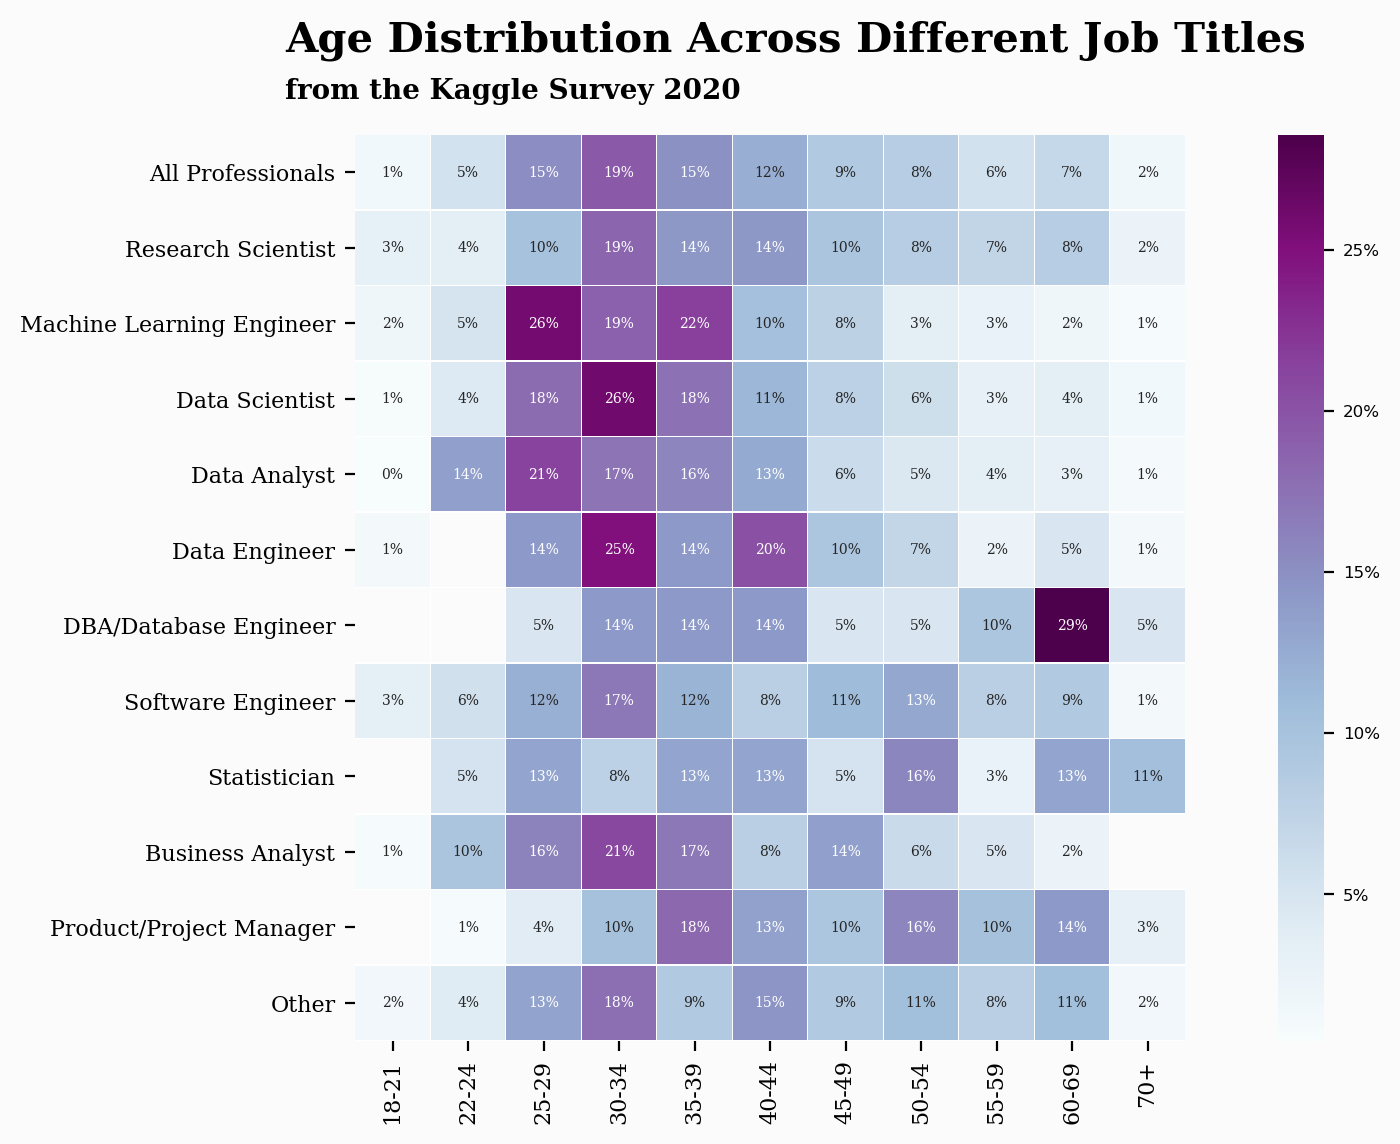

In [7]:
""" Figure2: Age Distributions across different job titles """

# join Age and jobtitle data 
df_q5q1 = df[['Q1','Q5']].groupby('Q5')['Q1'].value_counts().unstack().loc[q5_order]

# add "All Professionals" into the first row 
df_rowsum = pd.DataFrame([df_q5q1.sum(axis=0).tolist()], columns=df_q5q1.columns, index=['All Professionals'])
df_q5q1 = pd.concat([df_rowsum, df_q5q1], axis=0)

# convert it into ratio 
df_q5q1 = (df_q5q1.T / (df_q5q1.sum(axis=1) + 0.001)).T 




# plot the heatmap 
fig2, ax2 = plt.subplots(1,1,figsize=(12,6))

ax_heat = sns.heatmap(ax=ax2, data=df_q5q1, linewidths=.1, square=True, cmap='BuPu',
                      annot=True, fmt='.0%', annot_kws=dict(size=5, fontfamily='serif'),
                      cbar_kws=dict(format=FuncFormatter(lambda x,pos: f'{x:.0%}')))
# resize the ticklabels 
ax_heat.set_xticklabels(ax_heat.get_xmajorticklabels(), fontsize=8, fontfamily='serif')
ax_heat.set_yticklabels(ax_heat.get_ymajorticklabels(), fontsize=8, fontfamily='serif')
ax_heat.collections[0].colorbar.ax.tick_params(labelsize=6)

# Change background color
background_color = "#fbfbfb"
fig2.patch.set_facecolor(background_color) # figure background color
ax2.set_facecolor(background_color) # axes background color

ax2.set_xlabel("")
ax2.set_ylabel("")

fig2.text(0.37, 0.95, 'Age Distribution Across Different Job Titles', 
          fontsize=15, fontweight='bold', fontfamily='serif')
fig2.text(0.37, 0.91, 'from the Kaggle Survey 2020',
          fontsize=10, fontweight='bold', fontfamily='serif')

plt.show()

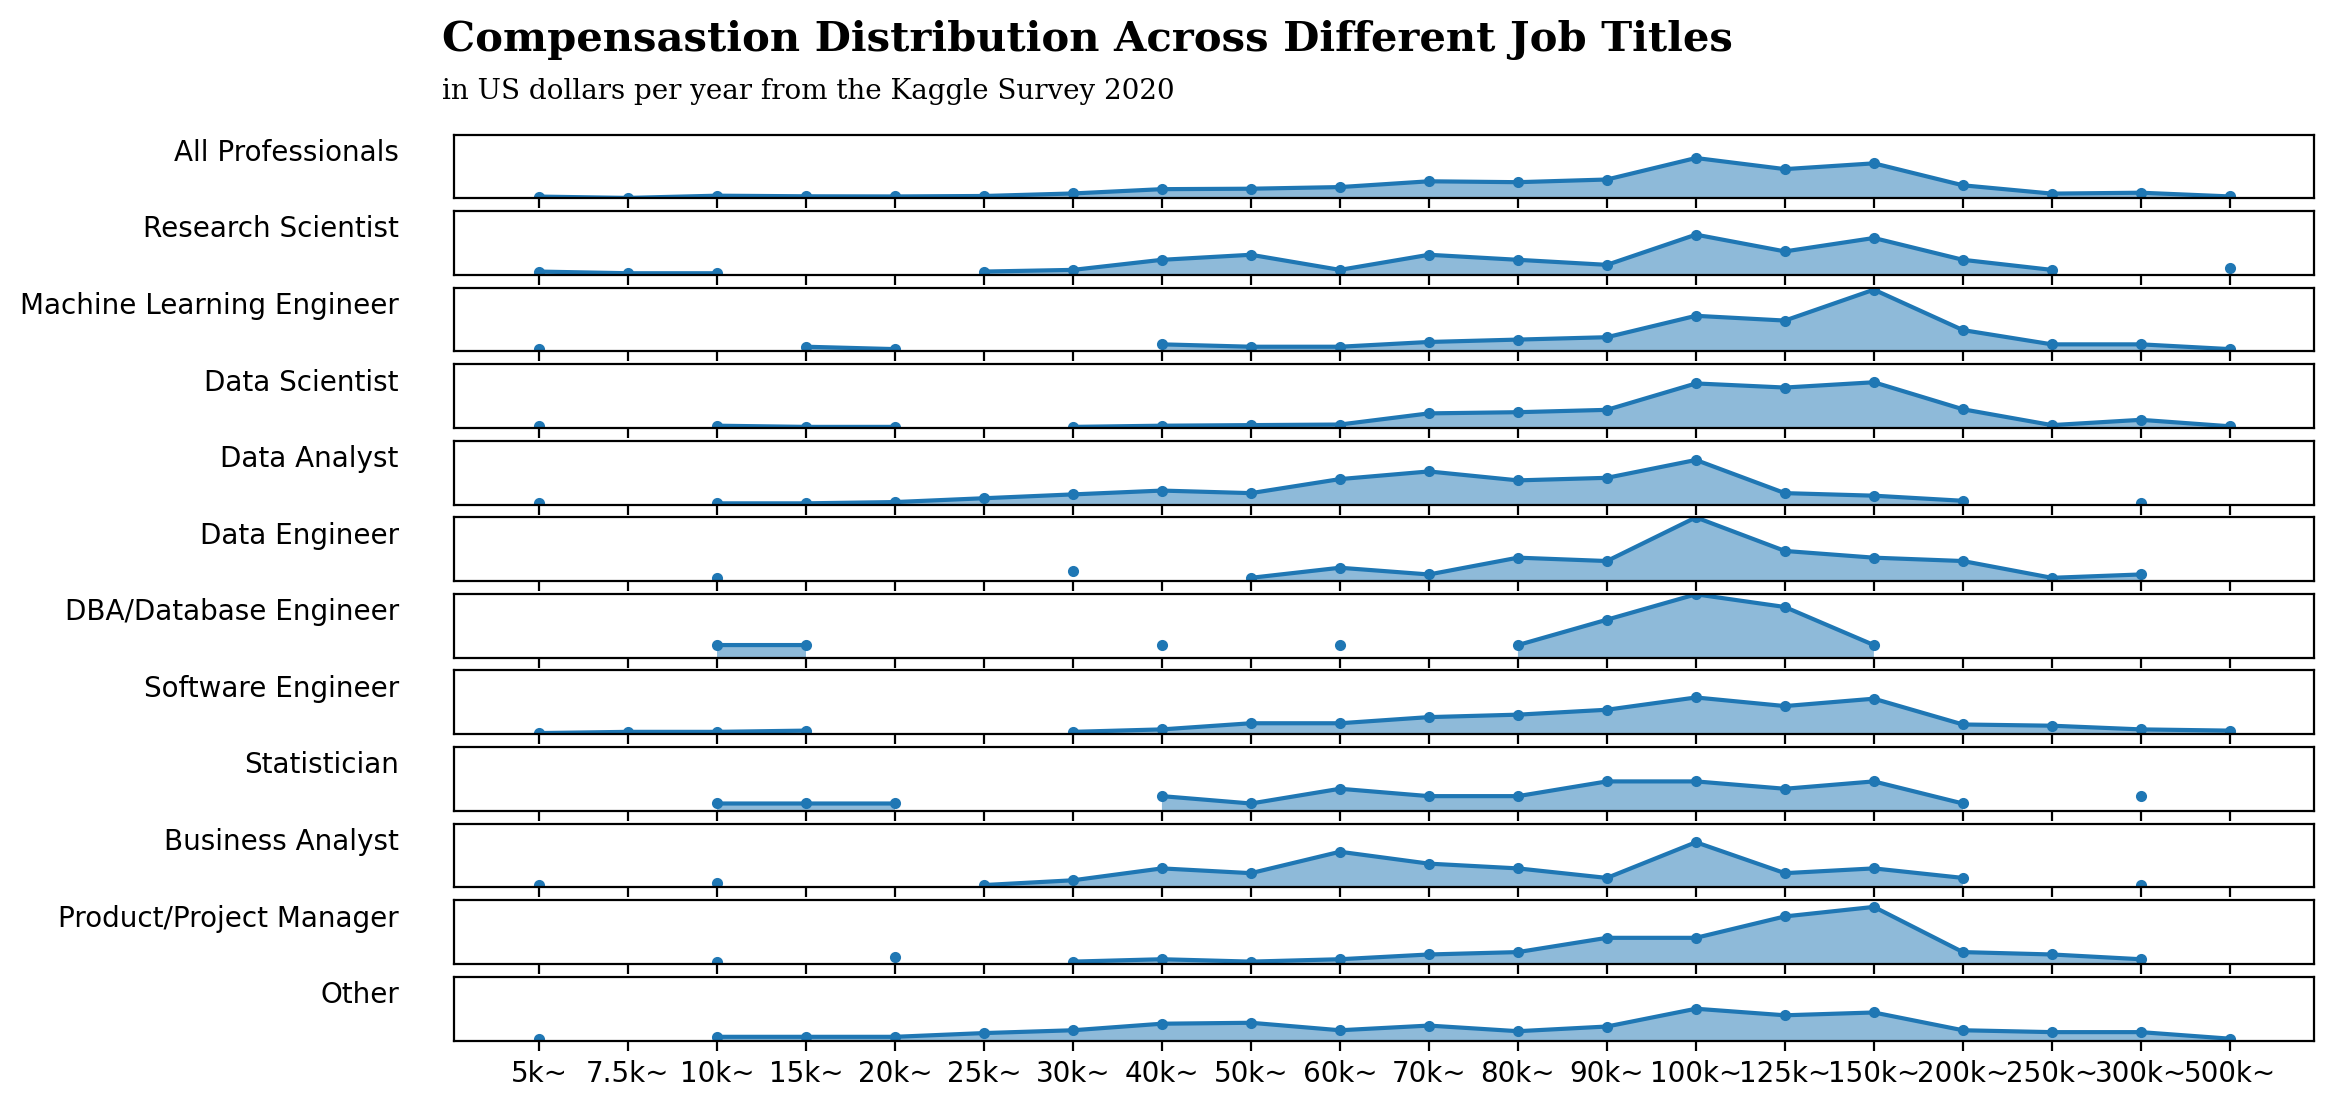

In [8]:
"""Figure4: Compensation Distribution Across Different Job Titles"""

# The first five compensation ranges seems unrealistic, which might be caused by confusion of monthly and yearly
# so let's assume that these ranges are faulse information and scrap them out. 

q24_order = [
#     "$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", # fault observations
    "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", 
    "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", 
    "50,000-59,999", "60,000-69,999", "70,000-79,999",
    "80,000-89,999", "90,000-99,999", "100,000-124,999", "125,000-149,999", 
    "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-500,000", "> $500,000"]
q24_map = {
#     "$0-999":"0~", "1,000-1,999":"1k~", "2,000-2,999":"2k~", "3,000-3,999":"3k~", "4,000-4,999":"4k~",
    "5,000-7,499":"5k~", "7,500-9,999":"7.5k~", "10,000-14,999":"10k~", "15,000-19,999":"15k~", 
    "20,000-24,999":"20k~", "25,000-29,999":"25k~", "30,000-39,999":"30k~", "40,000-49,999":"40k~", 
    "50,000-59,999":"50k~", "60,000-69,999":"60k~", "70,000-79,999":"70k~",
    "80,000-89,999":"80k~", "90,000-99,999":"90k~", "100,000-124,999":"100k~", 
    "125,000-149,999":"125k~", "150,000-199,999":"150k~", "200,000-249,999":"200k~", 
    "250,000-299,999":"250k~", "300,000-500,000":"300k~", "> $500,000":"500k~"}

df_q5q24 = df[['Q24', 'Q5']].dropna()
df_q5q24 = df_q5q24.groupby('Q5')['Q24'].value_counts().unstack()[q24_order].loc[q5_order]
df_q5q24 = df_q5q24.rename(columns=q24_map) # to short name

# add 'all professionals' into the first row 
df_rowsum = pd.DataFrame([df_q5q24.sum(axis=0).tolist()], columns=df_q5q24.columns, index=['All Professionals']) 
df_q5q24 = pd.concat([df_rowsum, df_q5q24], axis=0)

# convert the scale between 0-100 
df_q5q24 = 100*(df_q5q24.T / (df_q5q24.sum(axis=1) + 0.001)).T 


# plot the multiple graph 
fig4, axes4 = plt.subplots(df_q5q24.shape[0],1, sharex=True, figsize=(12,6))
ax_ylim = (0, df_q5q24.max().max())
for i, ax in enumerate(axes4): 
    ax.plot(df_q5q24.columns, df_q5q24.iloc[i,:],marker='.')
    ax.fill_between(df_q5q24.columns, ax_ylim[0], df_q5q24.iloc[i,:], alpha=0.5)
    ax.set_ylim(ax_ylim)
    ax.set_ylabel(df_q5q24.index[i], labelpad=20, rotation=0, horizontalalignment='right')
    ax.set_yticks([])

fig4.text(.12, 0.95, "Compensastion Distribution Across Different Job Titles", 
         fontsize=15, fontweight='bold', fontfamily='serif')

fig4.text(.12, 0.91, 'in US dollars per year from the Kaggle Survey 2020', 
         fontsize=10, fontweight='light', fontfamily='serif')

plt.show()

<a id="experience"></a>
[back to top](#table-of-contents)

# 4. What experience are required? Programming, Machine Learning, or Higher Education? 

Based on the Kaggle Survey, most data professionals have **3-5 years of programming experience** and **1-2 years of experience using machine learning**. However, both machine learning engineers and data scientists seem to have more experience(3-5 years) in using machine learning than other data jobs. Also, **having a master's degree** is most dominant across most data jobs except research scientists and statisticians. 

In [9]:
""" Data Wrangling for jobtitles-experience(programming&ML)  and jobtitles-education"""

#df[['Q5', 'Q4','Q6', 'Q15']].describe() # Q4(Education), Q6(Programming Exp.), Q15(ML Exp) 

# [DF1] Jobtitles(Q5) ~ (Programming(Q6)+ML(Q15))
# make a new list of columns to match Q6 and Q15
# Q6: 0, <1, 1-2, 3-5, 5-10, 10-20, 20+
# Q15: 0, <1, (1-2, 2-3), (3-4, 4-5), 5-10, 10-20, 20+
q6q15_order = ['0 year', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
# modify Q6
df_q6 = df[['Q6']].replace('I have never written code', q6q15_order[0])
# modify Q15
df_q15 = df[['Q15']].replace({'I do not use machine learning methods':q6q15_order[0],
                                'Under 1 year':q6q15_order[1], 
                                '2-3 years':q6q15_order[2], 
                                '3-4 years':q6q15_order[3], 
                                '4-5 years':q6q15_order[3], 
                                '20 or more years':q6q15_order[6]})
# combine Q5-Q6
df_q5q6 = pd.concat([df[['Q5']], df_q6], axis=1)
df_q5q6 = df_q5q6.groupby('Q5')['Q6'].value_counts().unstack().loc[q5_order][q6q15_order]
df_q5q6.fillna(0., inplace=True)

# add a row for 'all professionals' (mean)
df_q5q6_rowavg = pd.DataFrame([df_q5q6.mean(axis=0).tolist()], index=['All Professionals'], columns=df_q5q6.columns)
df_q5q6 = pd.concat([df_q5q6_rowavg, df_q5q6], axis=0)

# Scale the value between 0 to 200  
df_q5q6['sum'] = df_q5q6.sum(axis=1)
df_q5q6_ratio = 200*(df_q5q6.T / df_q5q6['sum']).T
df_q5q6_ratio.drop(columns='sum', axis=1, inplace=True)


# combine Q5-Q15 
df_q5q15 = pd.concat([df[['Q5']], df_q15], axis=1)
df_q5q15 = df_q5q15.groupby('Q5')['Q15'].value_counts().unstack().loc[q5_order][q6q15_order]
df_q5q15.fillna(0., inplace=True)

# add a row for 'all professionals' (mean)
df_q5q15_rowavg = pd.DataFrame([df_q5q15.mean(axis=0).tolist()], index=['All Professionals'], columns=df_q5q15.columns)
df_q5q15 = pd.concat([df_q5q15_rowavg, df_q5q15], axis=0)

# Scale the value between 0 to 200 
df_q5q15['sum'] = df_q5q15.sum(axis=1)
df_q5q15_ratio = 200*(df_q5q15.T / df_q5q15['sum']).T
df_q5q15_ratio.drop(columns='sum', axis=1, inplace=True)


# [DF2] Jobtitles(Q5) ~ Education(Q4)
q4_order = ['No Formal Edu.', 'Diploma', 'Bachelor', 'Master', 'PhD', 'Professional', 'Not to Answer']
q4_map = {'No formal education past high school':q4_order[0], 
            'Some college/university study without earning a bachelor’s degree':q4_order[1], 
            'Bachelor’s degree':q4_order[2], 
            'Master’s degree':q4_order[3], 
            'Doctoral degree':q4_order[4], 
            'Professional degree':q4_order[5], 
            'I prefer not to answer':q4_order[6]}

# combine Q5-Q4 
df_q4 = df[['Q4']].replace(q4_map)
df_q5q4 = pd.concat([df[['Q5']], df_q4], axis=1)
df_q5q4 = df_q5q4.groupby('Q5')['Q4'].value_counts().unstack().loc[q5_order][q4_order]
df_q5q4.fillna(0., inplace=True)

# add a row for 'all professionals' (mean)
df_q5q4_rowavg = pd.DataFrame([df_q5q4.mean(axis=0).tolist()], index=['All Professionals'], columns=df_q5q4.columns)
df_q5q4 = pd.concat([df_q5q4_rowavg, df_q5q4], axis=0)

# calculate the ratio 
df_q5q4['sum'] = df_q5q4.sum(axis=1)
df_q5q4_ratio = (df_q5q4.T / df_q5q4['sum']).T
df_q5q4_ratio.drop(columns='sum', axis=1, inplace=True)



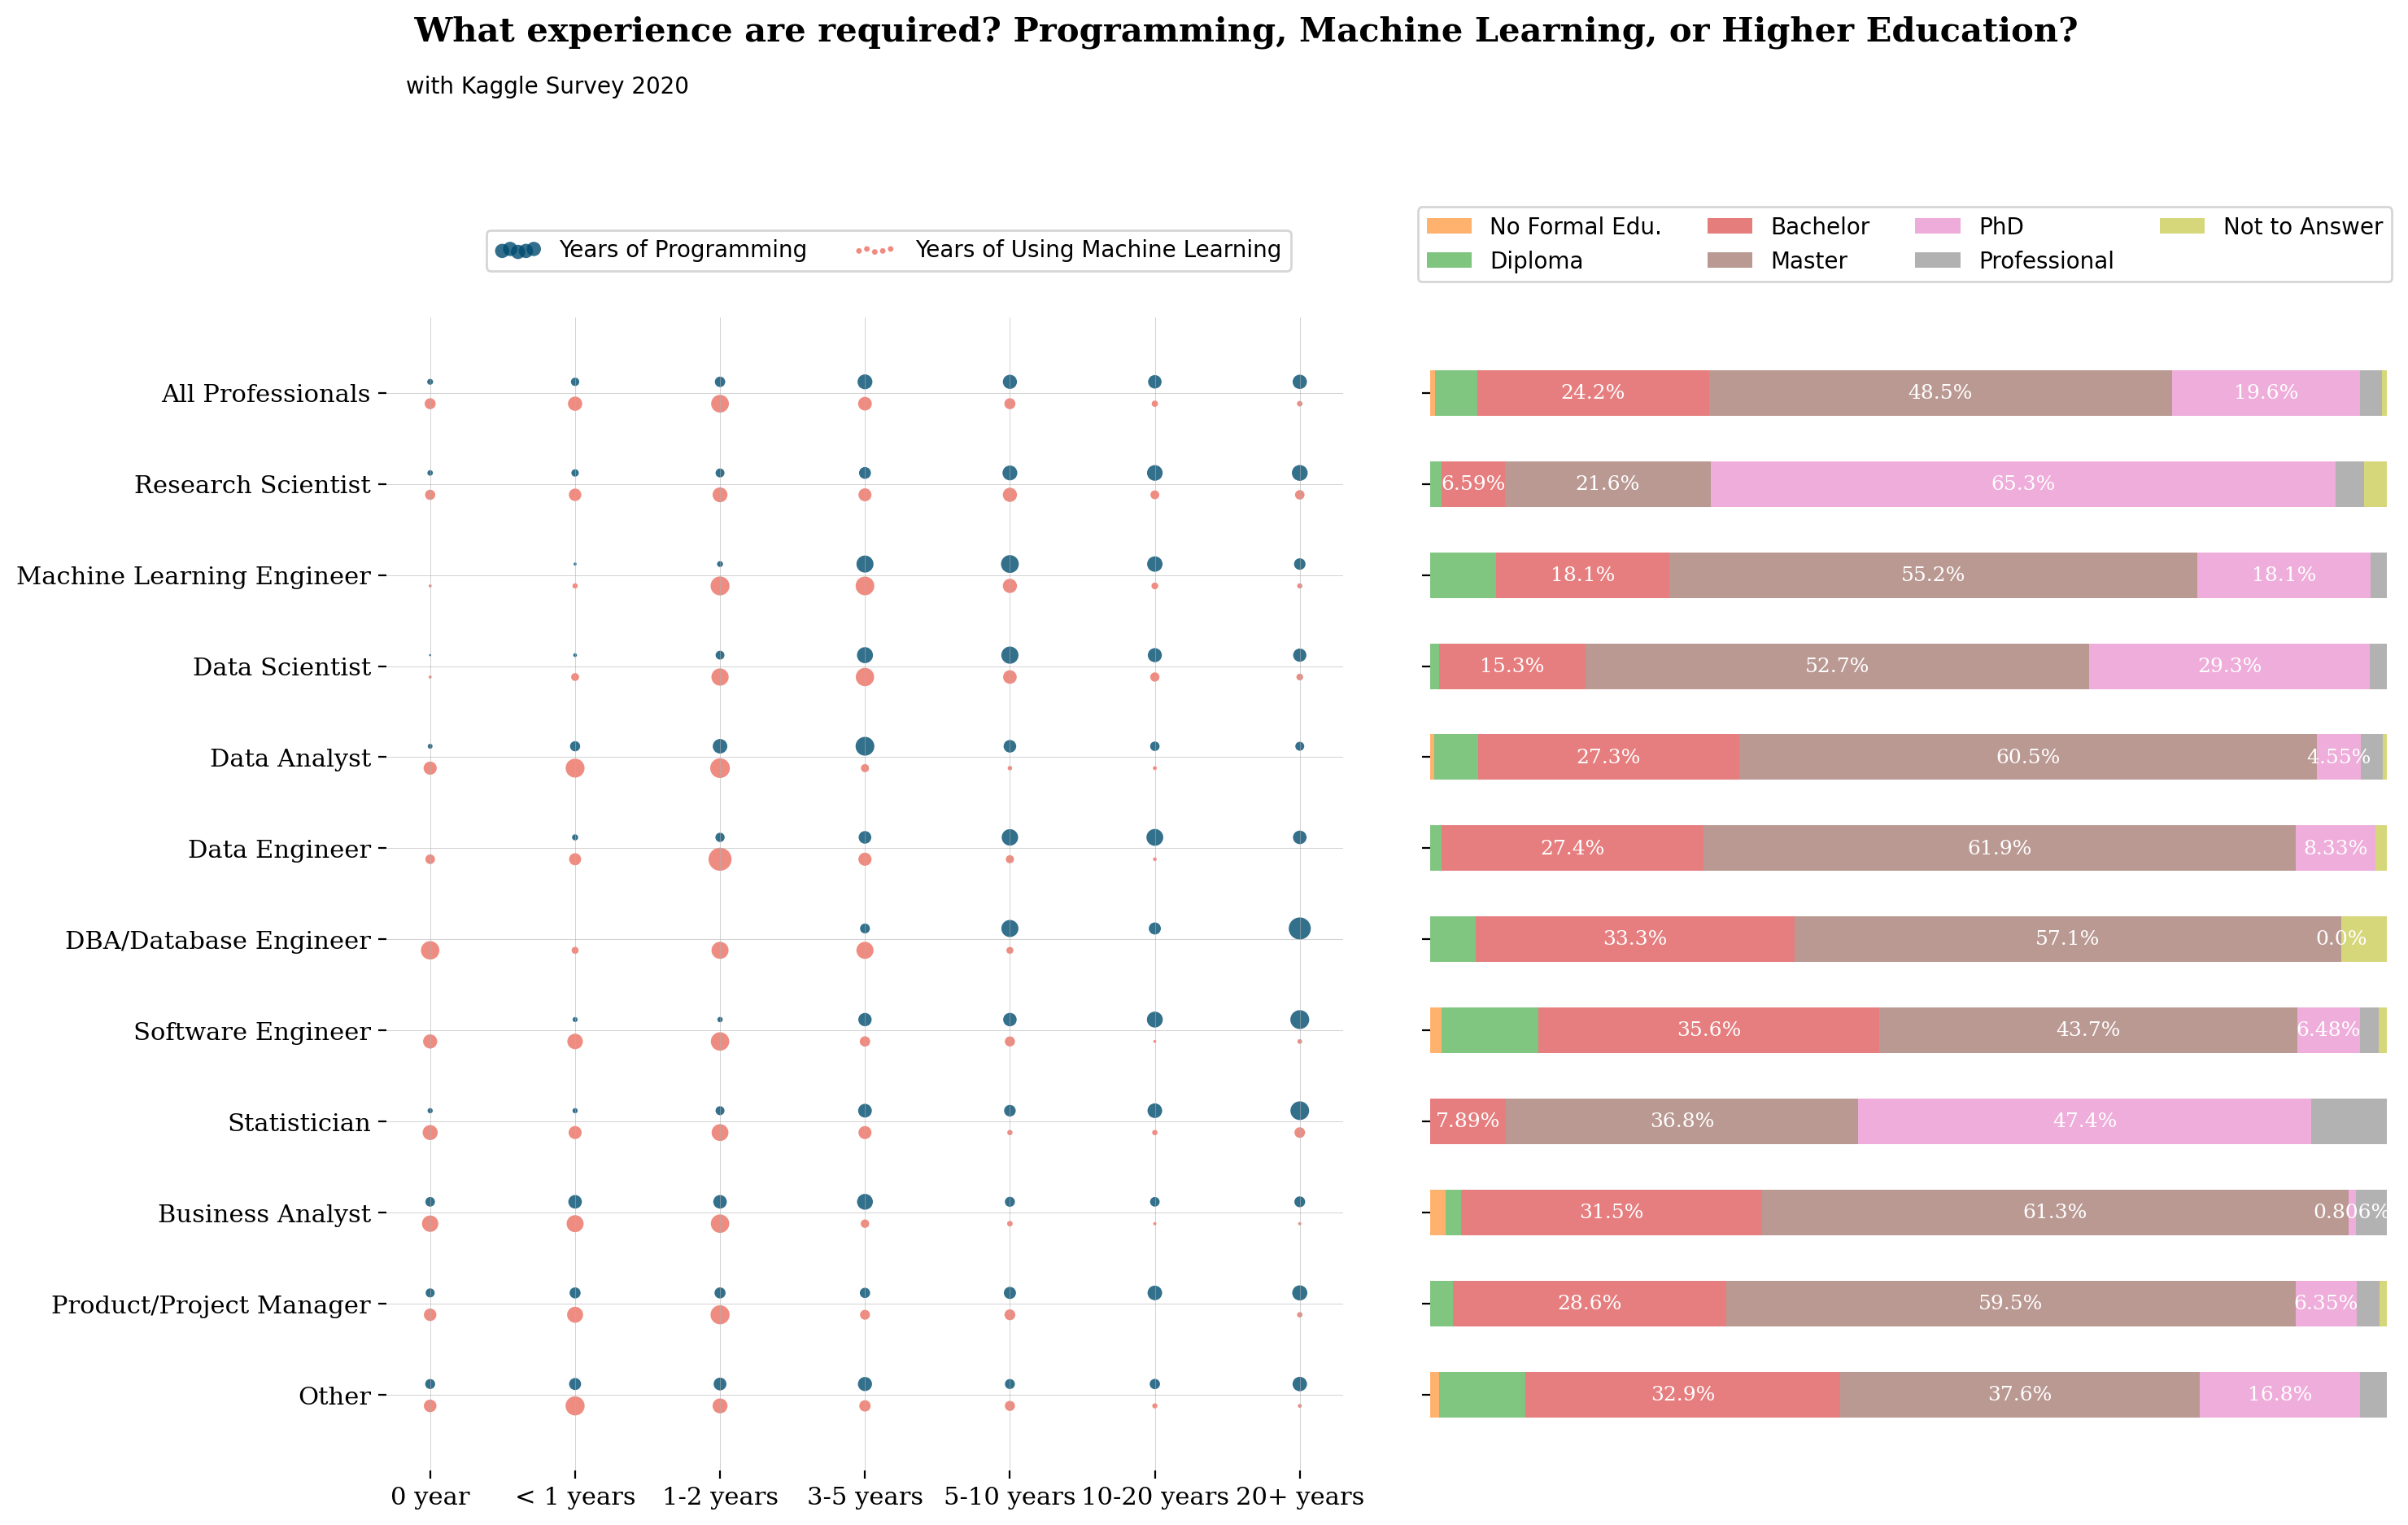

In [10]:
"""Figure5:  Multiple Plots of both jobtitles-experience(programming&ML) and jobtitles-education"""

# set figure 
fig5 = plt.figure(figsize=(20, 16), dpi=200)
gs5 = fig5.add_gridspec(5,5)

# Q5 ~ (Q6,Q15) graph (left)
df_q5q6_ratio = df_q5q6_ratio.iloc[::-1] # invert the order of rows (barh graph)

ax5p1 = fig5.add_subplot(gs5[1:4, 0:2])
for y, q5_idx in enumerate(df_q5q6_ratio.index): 
    for x, q6q15_idx in enumerate(df_q5q6_ratio.columns): 
        sc_q6 = ax5p1.scatter(x, y+0.12, s=df_q5q6_ratio.loc[q5_idx, q6q15_idx], color='#004c70', alpha=0.8, marker='o', edgecolors='none')
        sc_q15 = ax5p1.scatter(x, y-0.12, s=df_q5q15_ratio.loc[q5_idx, q6q15_idx], color='#ec7063', alpha=0.8, marker='o', edgecolors='none')
    
ax5p1.grid(linewidth=0.2, zorder=0)
ax5p1.set_yticks(range(len(df_q5q6_ratio.index)))
ax5p1.set_yticklabels(df_q5q6_ratio.index, fontfamily='serif', fontsize=11)
ax5p1.set_xticks(range(len(df_q5q6_ratio.columns)))
ax5p1.set_xticklabels(df_q5q6_ratio.columns, fontfamily='serif', fontsize=11)
ax5p1.legend((sc_q6, sc_q15), ('Years of Programming', 'Years of Using Machine Learning'), scatterpoints=5, 
                bbox_to_anchor=(0.95, 1.08), loc="upper right", borderaxespad=0.2, ncol=2)
for s in ['top', 'left', 'right', 'bottom']:
    ax5p1.spines[s].set_visible(False)


# Q5 ~ Q4 graph (right)
df_q5q4_ratio = df_q5q4_ratio.iloc[::-1] # invert the order of rows (barh graph)

ax5p2 = fig5.add_subplot(gs5[1:4, 2:4], sharey=ax5p1)
color_map = plt.get_cmap('tab10')(np.linspace(0.15, 0.85, df_q5q4_ratio.shape[1]))
df_q5q4_cumsum = df_q5q4_ratio.cumsum(axis=1)

for col, cr in zip(df_q5q4_ratio.columns, color_map):
    start = df_q5q4_cumsum[col] - df_q5q4_ratio[col]
    ax5p2.barh(df_q5q4_ratio.index, df_q5q4_ratio[col], left=start, height=0.5, color=cr, alpha=0.6, label=col)

for i in df_q5q4_ratio.index: 
    for col in ['Bachelor', 'Master', 'PhD']:
        ax5p2.annotate(f"{df_q5q4_ratio[col][i]*100:.3}%", 
                            xy=(df_q5q4_cumsum[col][i]-(df_q5q4_ratio[col][i]/2), i), 
                            va='center', ha='center', fontsize=9, fontweight='light', 
                            fontfamily='serif', color='white')

ax5p2.set_xlim(0,1)
ax5p2.set_xticks([])
plt.setp(ax5p2.get_yticklabels(), visible=False)
for s in ['top', 'left', 'right', 'bottom']:
    ax5p2.spines[s].set_visible(False)
    
ax5p2.legend( bbox_to_anchor=(1.01, 1.1), loc="upper right", borderaxespad=0.2, ncol=4)

fig5.text(0.13, 0.83, ' What experience are required? Programming, Machine Learning, or Higher Education?', 
            fontsize=15, fontweight='bold', fontfamily='serif')
fig5.text(0.131, 0.81, 'with Kaggle Survey 2020 ')
plt.show()

[back to top](#table-of-contents)

<a id="skills"></a>
# 5. What skills do you need to stand out your resume? Professionals vs. Students

As a programmer, skillsets have a great role in matching jobs. Skillsets might differ across various job fields, but I simplified the data to compare what data professionals use on regular basis and what students learn or practice to stand out their resumes. Here is the summary of the analysis from the graph below. 

- `Programming Languages`: Top language in DS & ML community is **Python** as expected. For other languages, students prefer to learn R over SQL, while many professionals work with SQL than R. 
- `Hosted Notebooks`: Around 30% of both professionals and students don't use hosted notebooks on regular basis, but the persons who use notebooks regularly favour working in **Colab, Kaggle, and Jupyter**. 
- `IDEs`: Most dominant IDEs used by both group is **Jupyter environment**
- `Visualization Tools`: Top four tools preferred by both groups are **Matplotlib, Seaborn, Ggplot, and Plotly**.
- `ML Frameworks`: Top three ML frameworks (**Scikit-learn, TensorFlow, and Keras**) are the same for both groups, but more students use Pytorch than Xgboost while professionals similarly use them both. 
- `ML Algorithms`: While both groups utilize **Linear/Logistic Regression and DecisionTrees/Random Forests** regularly, professionals use more Gradient Boosting Machines over Convolutional Neural Networks and Bayesian Approaches in their work.
- `Learning Platform`: Kaggle Professionals thinks that the best learning platform is **Coursera(21%) followed by Kaggle Learn Courses(12%)** while Students prefers to study through **University Courses(21%) and Coursera(18%)**
- `Media Sources`: Professionals usually share or report on data science topics via **Blogs(19%), Kaggle(16%) or YouTube(14%)** in order while Students would like to share in **Youtube(19%) the most, followed by Kaggle(17%) and Blogs(14%)** 

In [11]:
""" Data Wrangling for skillset gap between professionals and students"""
from collections import OrderedDict

# define the dict of pd.Series 
skillset_map = OrderedDict({'Programming Launguages':'Q7',
                            'IDEs':'Q9',   
                            'ML Frameworks':'Q16',
                            'Learning Platforms':'Q37',
                            'Hosted Notebooks':'Q10', 
                            'Visualization Tools':'Q14',
                            'ML Algorithms':'Q17',
                            'Media Sources':'Q39'
                           })
skillset_dict = OrderedDict()
        
def value_counts_multicolumns(mdf): 
    """count each value in the multiple columns, which should have single value per single column"""
    df_count = pd.Series(dtype='int')
    for c in mdf.columns: 
        df_count[mdf[c].value_counts().index[0]] = mdf[c].count()
    return df_count

# cacluate each value_counts 
for skill, quest in skillset_map.items(): 
    pro_count = value_counts_multicolumns(df.filter(regex=f"^(?=.*{quest})"))
    pro_ratio = 100. * (pro_count / pro_count.sum())
    
    std_count = value_counts_multicolumns(df_std.filter(regex=f"^(?=.*{quest})"))
    std_ratio = 100. * (std_count / std_count.sum())        
    
    skillset_dict[skill] = pd.concat([pro_ratio, std_ratio], axis=1).sort_values(0)
    skillset_dict[skill].rename(columns={0:'Professionals',1:'Students'}, inplace=True)

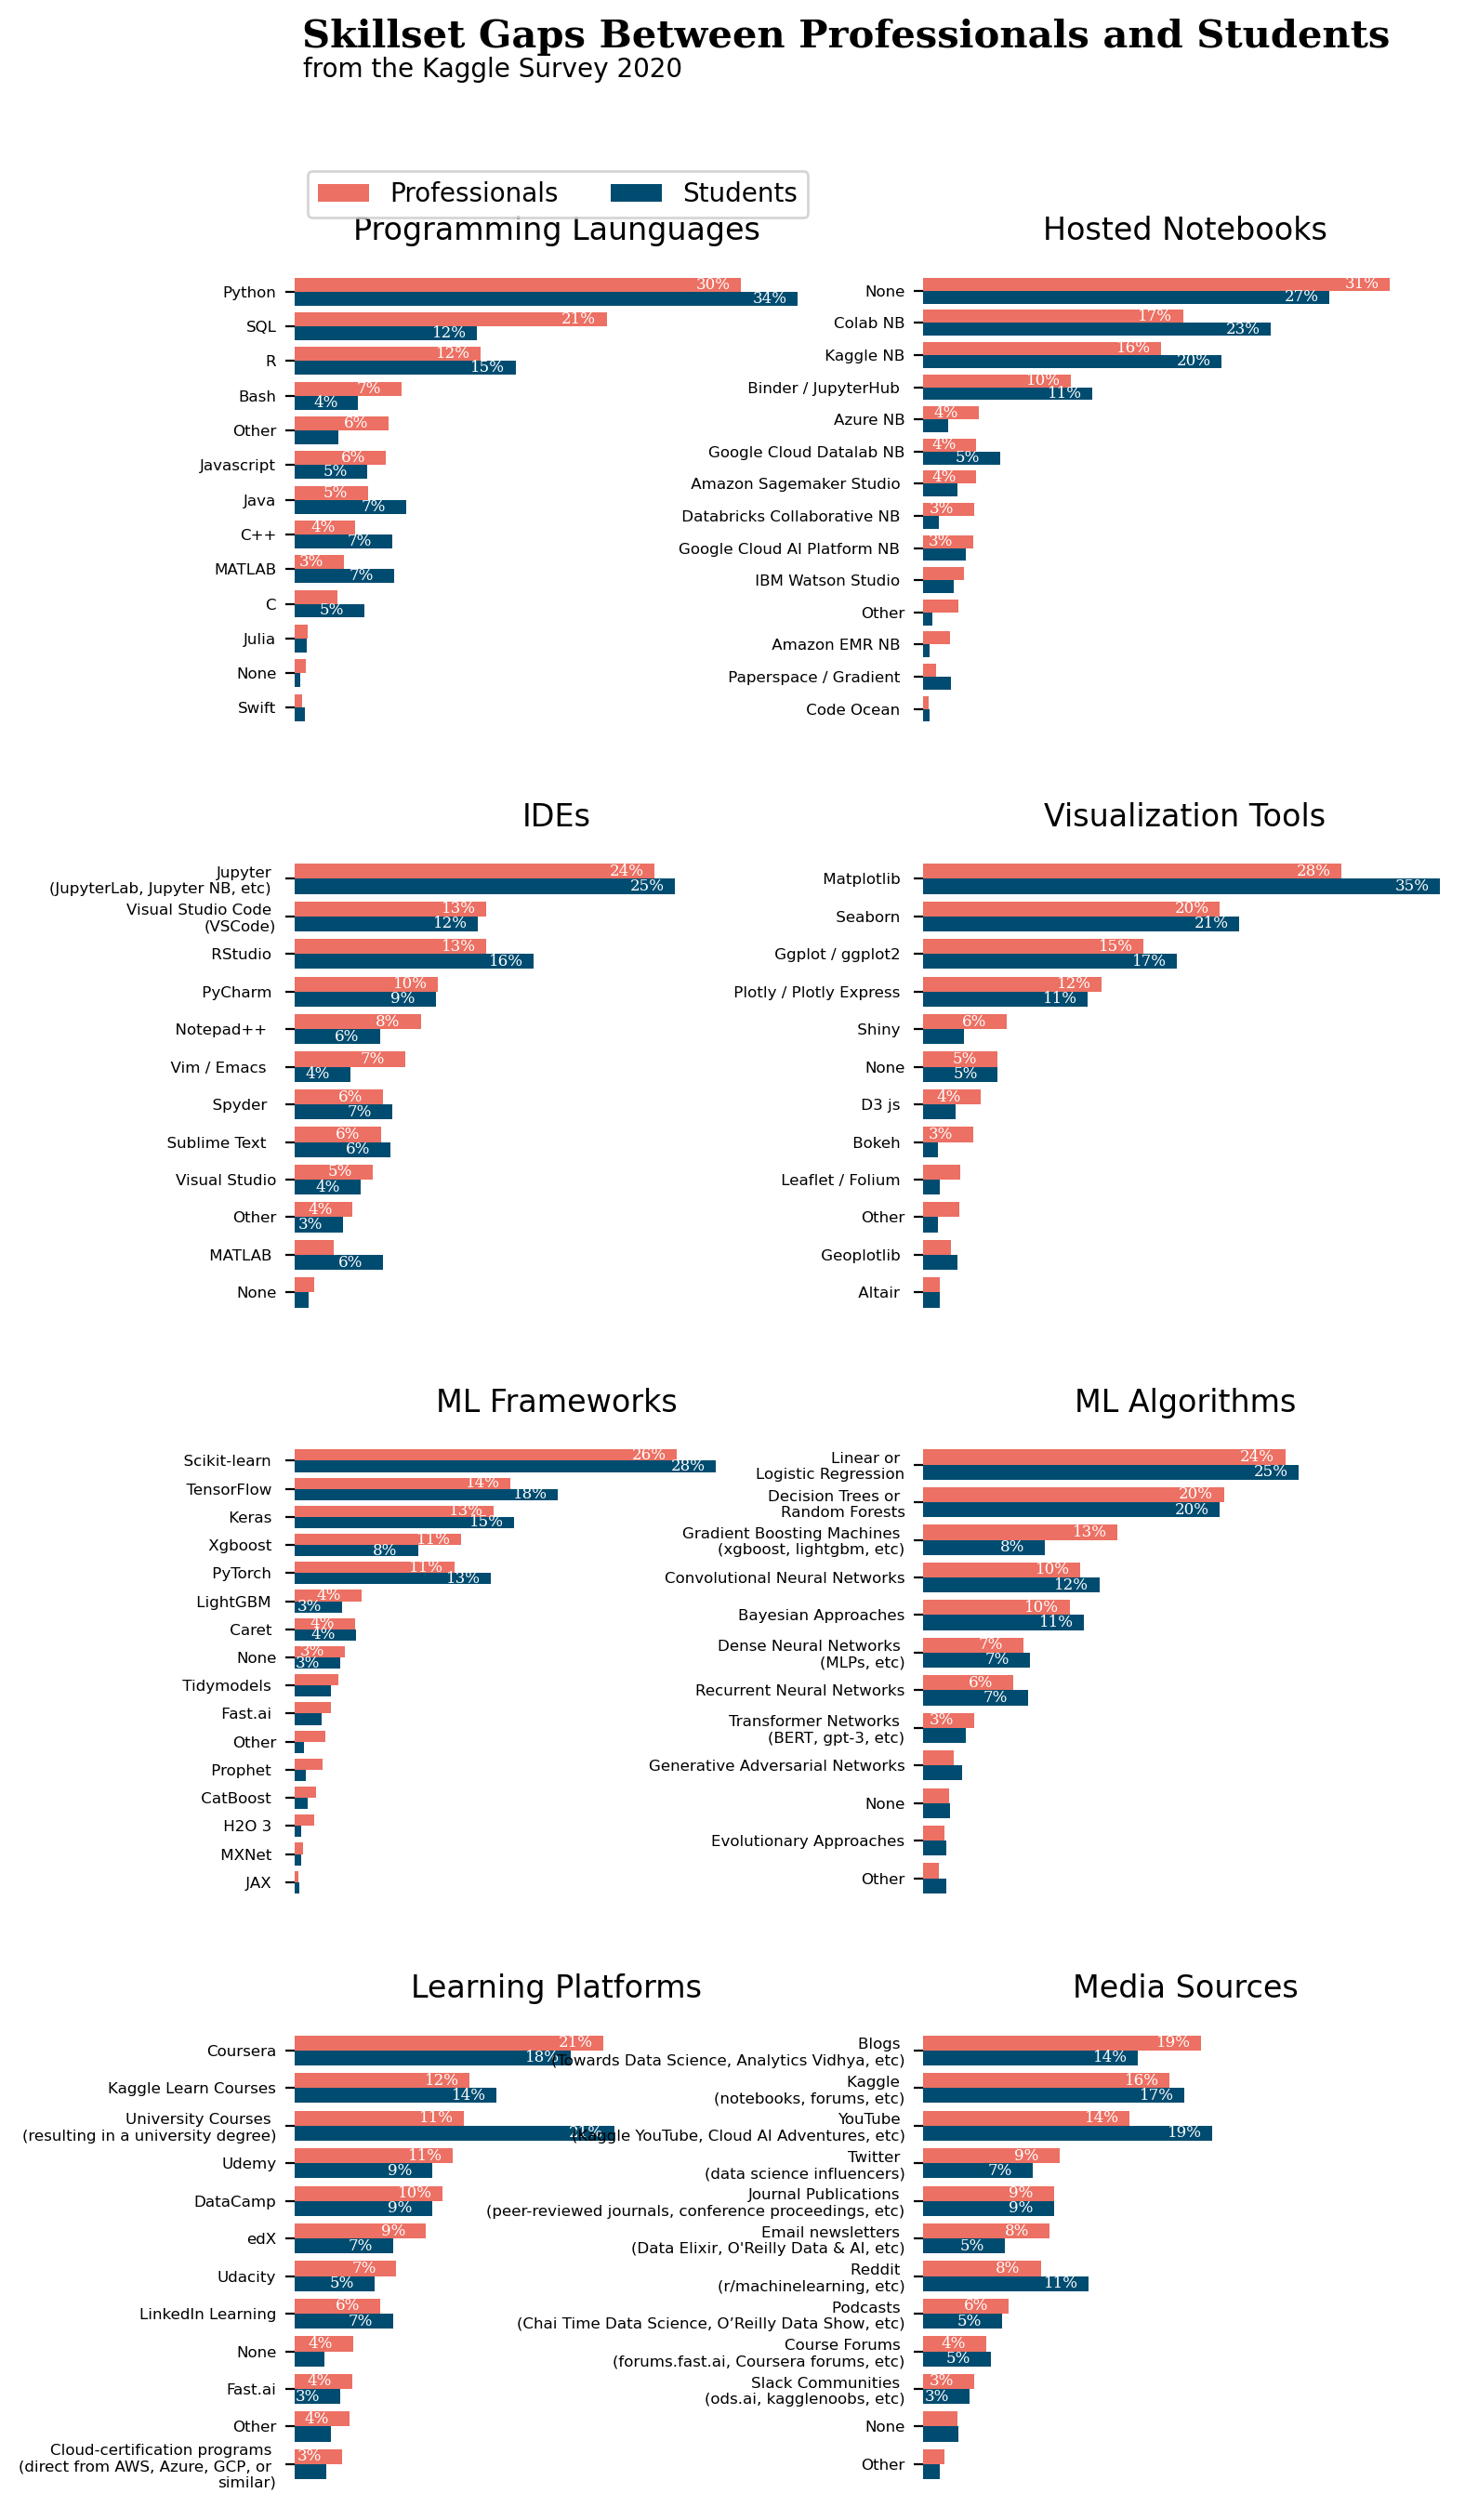

In [12]:
""" Figure6: multiple plots for skillset gap between professionals and students"""

# plot a horizontal barchart 
r, c = 4, 2
fig6, axs6 = plt.subplots(r,c,figsize=(8,16), sharex=True)

for idx, (skill, df_skill) in enumerate(skillset_dict.items()):
    y_range = np.arange(len(df_skill.index))
    bar_width = 0.4
                               
    barh_pro = axs6[idx%r][idx//r].barh(y_range + bar_width/2, df_skill['Professionals'], bar_width, color='#ec7063', label="Professionals") 
    barh_std = axs6[idx%r][idx//r].barh(y_range - bar_width/2, df_skill['Students'], bar_width, color='#004c70', label="Students")

    axs6[idx%r][idx//r].set_xlim(0, 35)
    axs6[idx%r][idx//r].set_xticks([])
    axs6[idx%r][idx//r].set_yticks(y_range)
    
    # shorten the index str 
    short_index = df_skill.index.str.replace('(','\n(')
    short_index = short_index.str.replace('Notebooks','NB')
    short_index = short_index.str.replace(' or ',' or \n')
    
    axs6[idx%r][idx//r].set_yticklabels(short_index, fontsize=6)
    axs6[idx%r][idx//r].set_title(skill)
#     axs6[idx%r][idx//r].legend(loc='lower center', prop=dict(size=5))
    
    for i, sk in enumerate(df_skill.index): 
        if (df_skill['Professionals'][sk] > 3):
            axs6[idx%r][idx//r].annotate(f"{df_skill['Professionals'][sk]:.0f}%",
                         xy=(df_skill['Professionals'][sk] - 3, i + bar_width/2), 
                         va = 'center', ha='left', fontweight='light', fontfamily='serif',
                         color='white', fontsize=6)
        if (df_skill['Students'][sk] > 3):
            axs6[idx%r][idx//r].annotate(f"{df_skill['Students'][sk]:.0f}%",
                 xy=(df_skill['Students'][sk] - 3, i - bar_width/2), 
                 va = 'center', ha='left', fontweight='light', fontfamily='serif',
                 color='white', fontsize=6)  
    for s in ['top', 'bottom', 'left', 'right']:
        axs6[idx%r][idx//r].spines[s].set_visible(False)

axs6[0][0].legend(bbox_to_anchor=(0,1.2), loc='upper left', ncol=2, prop=dict(size=10))
fig6.text(0.13, 0.95, 'Skillset Gaps Between Professionals and Students', 
          fontsize=15, fontweight='bold', fontfamily='serif')
fig6.text(0.131, 0.94,'from the Kaggle Survey 2020')

plt.show()


[back to top](#table-of-contents)

<a id='takeaways'></a>
# 6. Takeaways

As one of the job seekers who want to work in the data science field, I have been struggled to figure out what job title is suited for me. This article is not including all the information or gives you perfect answers but I hope that you can grasp some ideas of how different each data jobs are and what you need to focus on to land your dream job. Don't forget to check takeaways before leaving this article! 

> 1. A Master's Degree might be proper the level of education for getting data jobs. 
> 2. Python, Scikit-learn, and Jupyter notebook are the most essential skills in the data science field
> 3. Check out blogs, Kaggle, and youtube to communicate with working professionals

[back to top](#table-of-contents)

<a id='References'></a>
# 7. References

1. [
[Kaggle 2020] Visualization & Analysis](https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis#Q14.-Visualization-Library) written by [Subin An](https://www.kaggle.com/subinium)
2. [Enthusiast to Data Professional - What changes?](https://www.kaggle.com/spitfire2nd/enthusiast-to-data-professional-what-changes#3.-What-should-I-focus-on?) written by [Schubert](https://www.kaggle.com/spitfire2nd)